<a href="https://colab.research.google.com/github/hemanthreddy3741/Tasks_TSF/blob/main/Task3_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: Find out weak areas where we can work to make more profit for the data of a superstore.
### Author: Hemanth Reddy 
### batch:#gripjune2022

## Step 1: Downloading the required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [ ]:
#downloading the dataset
import io
sample = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

# Step 2: Understanding the data.

In [ ]:
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
sample.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
print(sample.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#checking missing values
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#Step 3: Removing the duplicates from the data

In [ ]:
sample.duplicated().sum()

17

In [ ]:
sample.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
print(sample.Category.unique())

['Furniture' 'Office Supplies' 'Technology']


In [ ]:
sample.rename(columns = {'Sub-Category':'Sub_category'}, inplace = True)


In [ ]:
print(sample.Sub_category.unique())
print(sample.Sub_category.nunique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
17


In [ ]:
print(sample.State.unique())
print(sample.State.nunique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
49


In [ ]:
print(sample.City.unique())
print(sample.City.nunique())

['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 'Saint Petersburg'

In [ ]:
#df_sample=sample
#df_sample=df_sample.drop(columns="Profit",axis=1)

Text(0.5, 0, 'Sales')

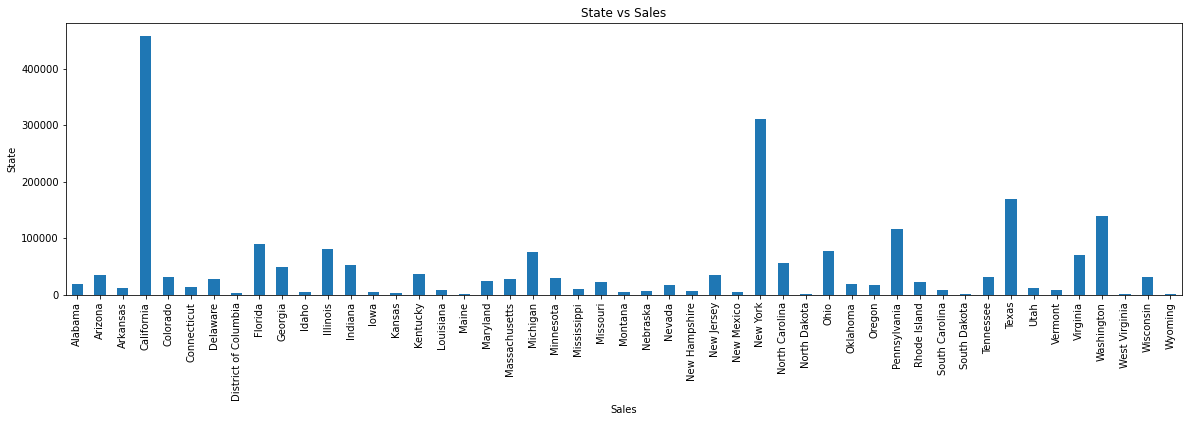

In [ ]:
temp= sample.groupby(['State'])["Sales"].sum()
temp.plot(kind="bar",figsize=(20,5))
plt.title('State vs Sales')
plt.ylabel('State')
plt.xlabel('Sales')

##Observations:
## 1. Here we can see that most sales are in the states of California and New york.
## 2. The bar graph shows that the states of District of Clombia, Idaho, Maine, Montana, Nebraska, New Hampshire, New Mexico, North dakota, South dakota, West Virginia, Wyoming are very poor in sales.



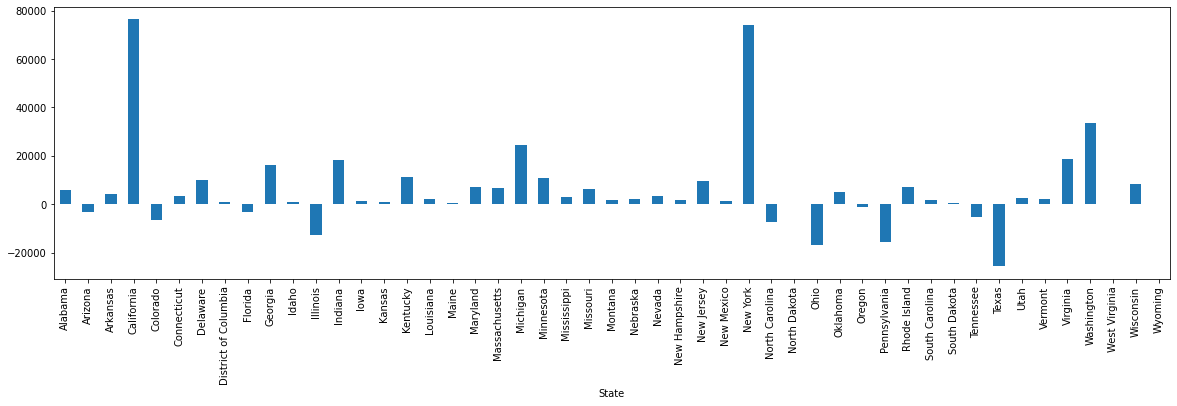

In [ ]:
temp1= sample.groupby(['State'])["Profit"].sum()
temp1.plot(kind="bar",figsize=(20,5))
plt.title('State vs Profit')
plt.ylabel('Profit')
plt.xlabel('State')

## Observations:
##1. The states Texas, Ohio, Pennsylvania, Illinois,North Carolina,Colorado,Florida, Arizona are in losses.



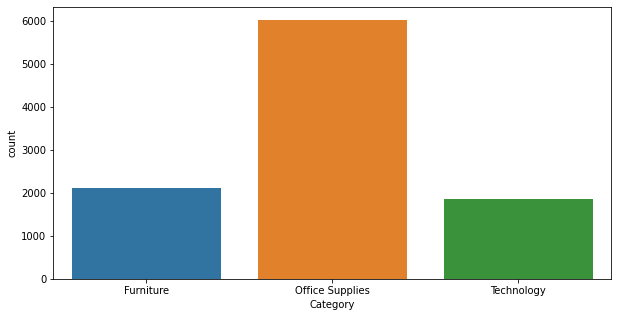

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Category', data = sample)
plt.show()

Text(0.5, 0, 'Profit')

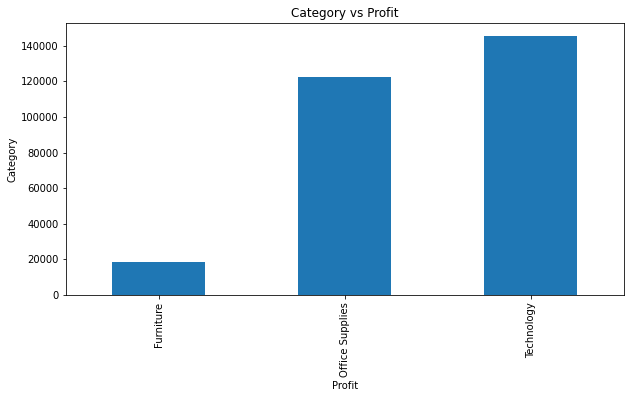

In [ ]:
temp2= sample.groupby(['Category'])["Profit"].sum()
temp2.plot(kind="bar",figsize=(10,5))
plt.title('Category vs Profit')
plt.ylabel('Category')
plt.xlabel('Profit')

## Observations:
## 1. Profits are more in the category of Technology.
## 2. The profits in the sales of furniture is less compared to other categories.

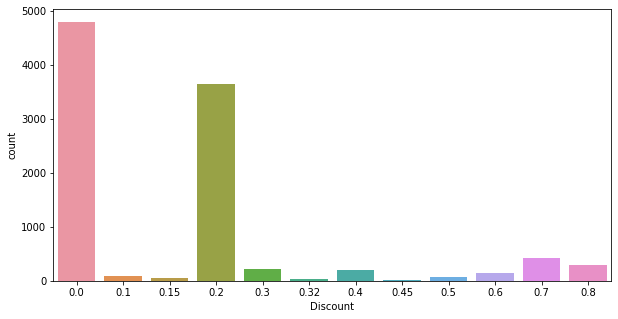

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Discount", data = sample)
plt.show()

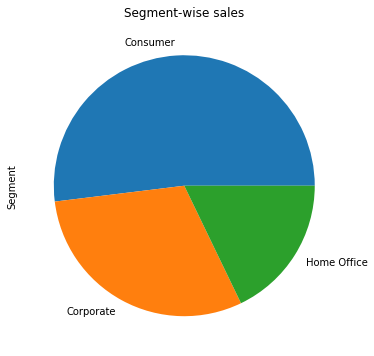

In [ ]:
plt.figure(figsize=(10,6))
sample['Segment'].value_counts().plot.pie()
plt.title('Segment-wise sales')
plt.show()


##Observations:
##1.Consumer segment has the most sales for the super store.
##2. Home office segment has the least contribution to the sales.

In [ ]:
sample.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

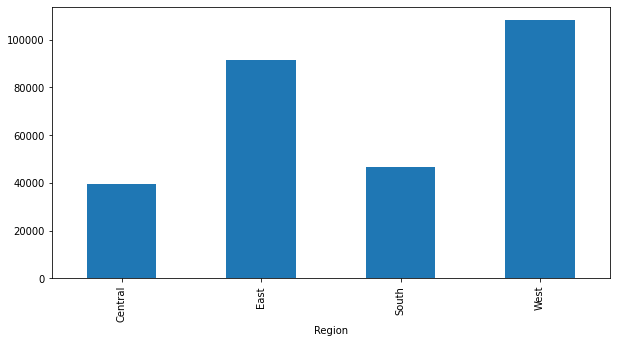

In [ ]:
temp3= sample.groupby(['Region'])["Profit"].sum()
temp3.plot(kind="bar",figsize=(10,5))
plt.title('Region vs Profit')
plt.ylabel('Region')
plt.xlabel('Profit')

##Observations:
##1. The West and East regions are the highest contributors of the sales for the store.
##2. The Central and South regions are the least contributors for the sales of the store.

Text(0.5, 0, 'Category')

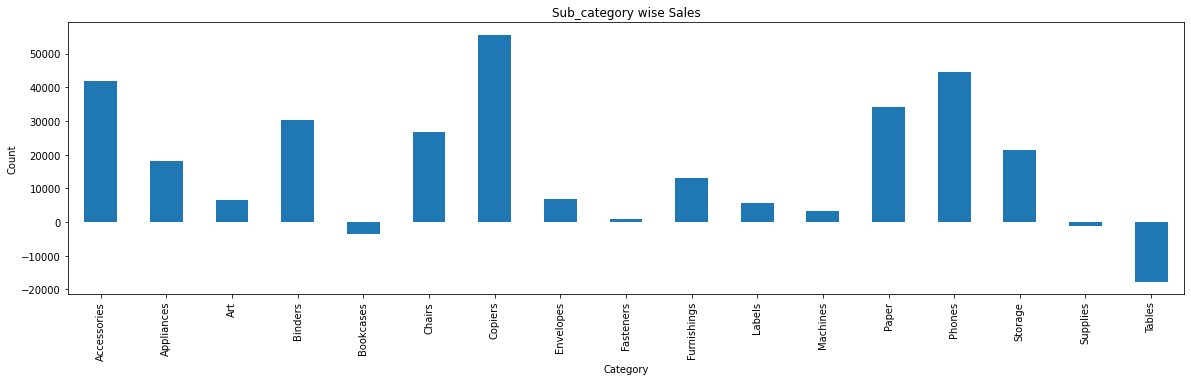

In [ ]:
temp5= sample.groupby(['Sub_category'])["Profit"].sum()
temp5.plot(kind="bar",figsize=(20,5))
plt.title('Sub_category vs Profit')
plt.ylabel('Sub_category')
plt.xlabel('Profit')

##Observations:
##1. The sale of products like tables, Bookcases are in losses.


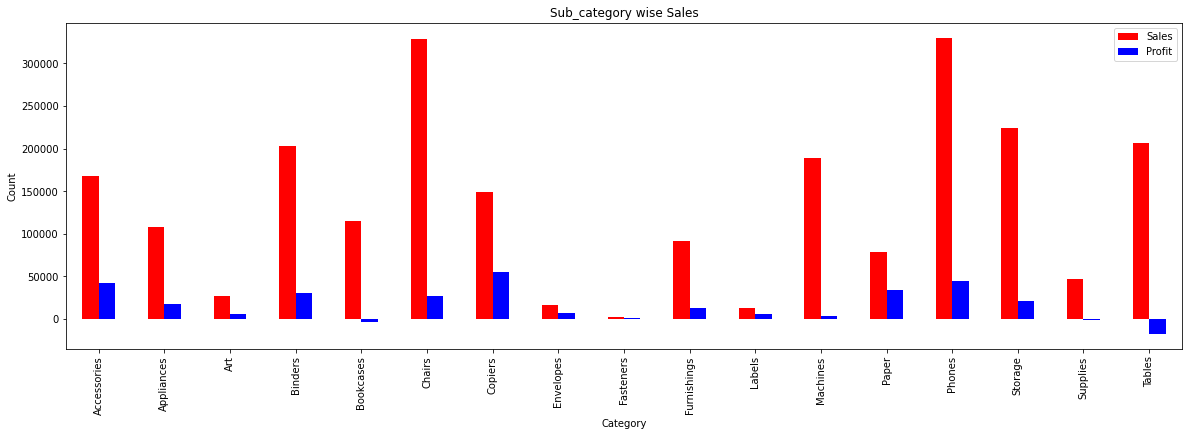

In [ ]:
sample.groupby(['Sub_category'])['Sales','Profit'].sum().plot.bar(color=['Red','Blue'],figsize=(20,6))
plt.title('Sub_category wise Sales')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()

##Observations:
##1.The sales of tables,bookcases and supplies are showing no profit and acquiring loss to the store.
##2.Eventhough having more Sales in machines, it is showing less profits.

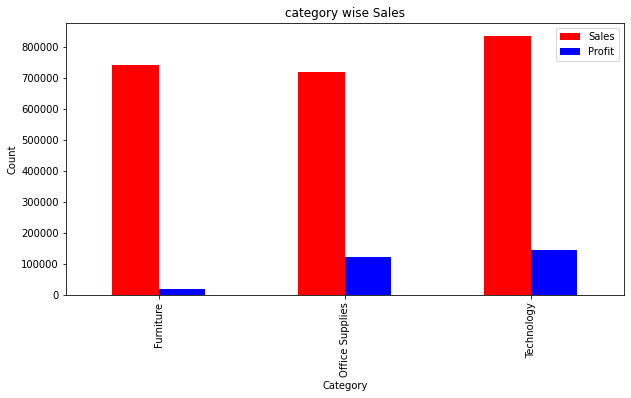

In [ ]:
sample.groupby(['Category'])['Sales','Profit'].sum().plot.bar(color=['Red','Blue'],figsize=(10,5))
plt.title('category wise Sales')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()

##Observations:
##1.Here the category sales and profit proves that the furniture is the loss making category for the store compared to the other two categories.

#Key Observations:
1.Here we can see that most sales are in the states of California and New york.

2.The bar graph shows that the states of District of Clombia, Idaho, Maine, Montana, Nebraska, New Hampshire, New Mexico, North dakota, South dakota, West Virginia, Wyoming are very poor in sales.

3.The states Texas, Ohio, Pennsylvania, Illinois,North Carolina,Colorado,Florida, Arizona are having no profits at all.

4.Profits are more in the category of Technology.

5.The profits in the sales of furniture is less compared to other categories.

6.Consumer segment has the most sales for the super store.

7.Home office segment has the least contribution to the sales.

8.The West and East regions are the highest contributors of the sales for the store.

9.The Central and South regions are the least contributors for the sales of the store.

10.The sale of products like tables, Bookcases are in losses.

11.The sales of tables,bookcases and supplies are showing no profit and acquiring loss to the store.

12.Eventhough having more Sales in machines, it is showing less profits.




#Suggestions:

##The sales of tables, bookcases and supplies are showing no profit and acquring losses to the store. these products should be discontinued.

##Sales in machines is showing less profits eventhough having more sales, there should be more focus on the profits for this product.

##The Category of Furniture is weak and should be focused more for the profits.